In [1]:
import github_fetching as fetcher
import data_cleaning as cleaner
import sentiment_analysis as analyzer
import visualization as visualizer
import embedding_gen as embedder
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML, IFrame
from node2vec import Node2Vec


In [2]:
xz_folder = 'tukaani-project_xz/'

In [3]:
issue_pr_location = fetcher.fetch_issues_pr(folder_location = xz_folder)
cleaner.clean_thread(issue_pr_location)

Fetching Issues and PRs for tukaani-project/xz
Total 45 issue fetched
Total 40 pr fetched
----------------------------------------------
Data Cleaning in Progress
Total 85 files cleaned
----------------------------------------------


In [4]:
post_sentiment_results, user_interactions = analyzer.sentiment_analysis()

Running thread-level sentiment analysis...
Thread-level sentiment analysis done on 85 posts.
----------------------------------------------
Now cleaning user interactions...
Done cleaning for user interactions
----------------------------------------------
Now fetching GitHub usernames
Done GitHub username fetching
Cleaned user interactions saved.
----------------------------------------------
Now constructing individual conversations
Skipping file Luis_Carilla_Ternero_to_Ari_Archer_(migrated_to_https://git.ari.lt/ari).csv due to error: Protocol not known: tukaani-project_xz/individual_conversations/Luis_Carilla_Ternero_to_Ari_Archer_(migrated_to_https
Skipping file Ari_Archer_(migrated_to_https://git.ari.lt/ari)_to_Luis_Carilla_Ternero.csv due to error: Protocol not known: tukaani-project_xz/individual_conversations/Ari_Archer_(migrated_to_https
Skipping file Ari_Archer_(migrated_to_https://git.ari.lt/ari)_to_Tuukka_Rouhiainen.csv due to error: Protocol not known: tukaani-project_xz/i

In [5]:
user_interactions = pd.DataFrame(user_interactions)
graph_path = visualizer.generate_network(xz_folder, user_interactions, 'network_graph.html', 0)

Generating network graph with user interactions...
Network saved to tukaani-project_xz/network_graph.html
----------------------------------------------


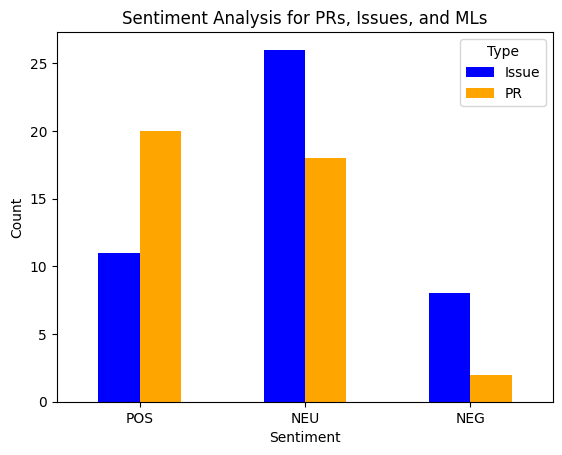

In [6]:
visualizer.post_analysis_visualization(post_sentiment_results)

In [7]:
visualizer.show_graph(graph_path)

In [8]:
# Step 1: Create the graph
graph = embedder.create_graphs_from_interactions(user_interactions)

# Step 2: Compute embeddings with original names preserved
graph_embeddings, node_to_int, int_to_node = embedder.compute_graph_embeddings(graph)

In [9]:
graph_embeddings = pd.DataFrame(graph_embeddings)
graph_embeddings

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,0.006535,0.007661,0.006531,-0.00627,-0.006941,-0.003704,-0.003503,0.003767,-0.005452,-0.006917,...,0.003601,-0.005097,0.002239,0.00287,0.001252,0.007573,-0.001235,0.005192,0.003105,0.005315


Computing transition probabilities:   0%|          | 0/84 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 200/200 [00:01<00:00, 172.51it/s]
/Users/yihaolin/oss_security/venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12417 (\N{HIRAGANA LETTER ME}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yihaolin/oss_security/venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12425 (\N{HIRAGANA LETTER RA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yihaolin/oss_security/venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127988 (\N{WAVING BLACK FLAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


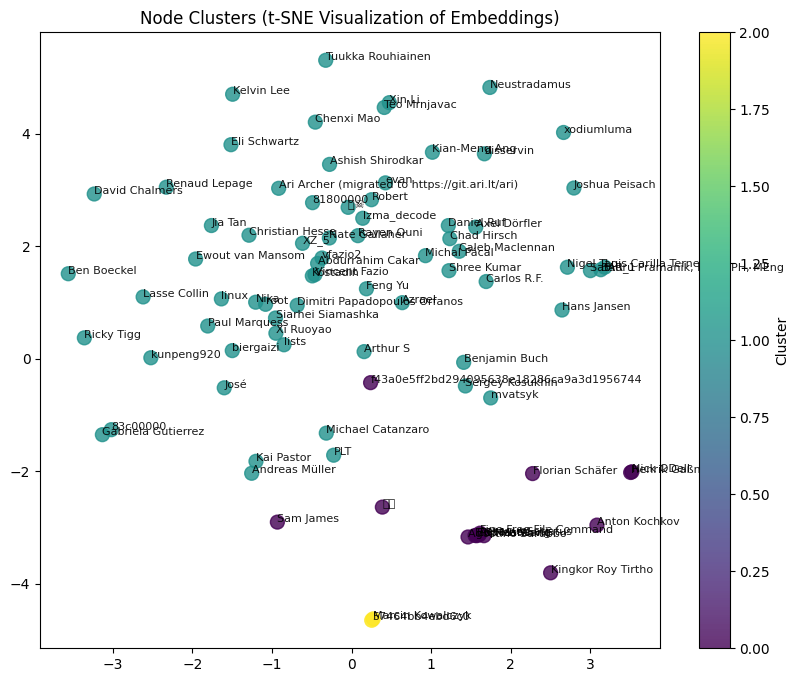

In [10]:
# Step 3: Calculate node embeddings
node_embeddings = embedder.calculate_node_embeddings(graph[0])  # No relabeling for Node2Vec

# Step 4: Perform clustering
node_clusters, embeddings, labels, node_list = embedder.cluster_node_embeddings(node_embeddings, clusters=3)

# Step 5: Visualize clusters with original names
embedder.visualize_clusters(embeddings, labels, node_list, int_to_node=int_to_node)